# REDES NEURAIS ARTIFICIAIS
## Evaluate Improve e Tunning

# Parte 1 - Pré-processamento dos Dados

### Importar as libs

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [2]:
tf.__version__

'2.5.0'

### Importar o dataset

In [3]:
dataset = pd.read_csv('Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
X = dataset.iloc[:, 3:13].values
y = dataset.iloc[:, 13].values
print("X >>\n",X)
print("y >>\n",y)

X >>
 [[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]
y >>
 [1 0 1 ... 1 1 0]


### Transformando os dados categóricos


In [5]:
# Label Encoding the "Gender" column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])
print(X)
# One Hot Encoding the "Geography" column
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))
print(X)

[[619 'France' 0 ... 1 1 101348.88]
 [608 'Spain' 0 ... 0 1 112542.58]
 [502 'France' 0 ... 1 0 113931.57]
 ...
 [709 'France' 0 ... 0 1 42085.58]
 [772 'Germany' 1 ... 1 0 92888.52]
 [792 'France' 0 ... 1 0 38190.78]]
[[1.0 0.0 0.0 ... 1 1 101348.88]
 [0.0 0.0 1.0 ... 0 1 112542.58]
 [1.0 0.0 0.0 ... 1 0 113931.57]
 ...
 [1.0 0.0 0.0 ... 0 1 42085.58]
 [0.0 1.0 0.0 ... 1 0 92888.52]
 [1.0 0.0 0.0 ... 1 0 38190.78]]


# Dividindo o dataset em conjunto de treinamento e conjunto de teste

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Feature Scaling

In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [8]:
np.shape(X_train)

(8000, 12)

---
# Parte 2 -Vamos construir uma ANN!


### Initializing the ANN

In [9]:
ann = tf.keras.models.Sequential()

### Adding the input layer and the first hidden layer

In [10]:
ann.add(tf.keras.layers.Dense(units=6, activation='selu'))

### Adding the second hidden layer

In [11]:
ann.add(tf.keras.layers.Dense(units=6, activation='selu'))

### Adding the output layer

In [12]:
ann.add(tf.keras.layers.Dense(units=1, activation='softplus'))

## Part 3 - Training the ANN

### Compiling the ANN

In [13]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Training the ANN on the Training set

In [14]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
250/250 [==============================] - 1s 803us/step - loss: 3.8784 - accuracy: 0.3556
Epoch 2/100
250/250 [==============================] - 0s 843us/step - loss: 3.8329 - accuracy: 0.3582
Epoch 3/100
250/250 [==============================] - 0s 835us/step - loss: 3.7784 - accuracy: 0.3598
Epoch 4/100
250/250 [==============================] - 0s 843us/step - loss: 3.7076 - accuracy: 0.3616
Epoch 5/100
250/250 [==============================] - 0s 823us/step - loss: 3.6165 - accuracy: 0.3629
Epoch 6/100
250/250 [==============================] - 0s 839us/step - loss: 3.5506 - accuracy: 0.3655
Epoch 7/100
250/250 [==============================] - 0s 759us/step - loss: 3.3316 - accuracy: 0.3767
Epoch 8/100
250/250 [==============================] - 0s 799us/step - loss: 3.1058 - accuracy: 0.3832
Epoch 9/100
250/250 [==============================] - 0s 739us/step - loss: 2.9034 - accuracy: 0.3887
Epoch 10/100
250/250 [==============================] - 0s 839us/step - l

# Parte 3 - Fazendo predições e avaliando o modelo

## Prevendo os resultados com o conjunto de testes

In [15]:
y_pred = ann.predict(X_test)
y_pred

array([[0.33065453],
       [0.35497347],
       [0.22410746],
       ...,
       [0.26612616],
       [0.13677408],
       [0.17155342]], dtype=float32)

In [16]:
y_pred = (y_pred > 0.5)
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

# Criando uma Confusion Matrix

In [17]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1543   52]
 [ 210  195]]


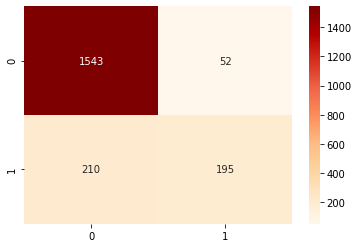

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, y_pred), cmap='OrRd', annot=True, fmt='2.0f')
plt.show()

In [19]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.869

---
# Avaliando o Modelo

In [20]:
# Evaluating the ANN
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [21]:
def build_classifier():
    classifier = Sequential()
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'selu', input_dim = 12))
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'selu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'softplus'))
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier

In [22]:
classifier = KerasClassifier(build_fn = build_classifier, batch_size = 10, epochs = 10)
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10, n_jobs = -1)
mean = accuracies.mean()
variance = accuracies.std()

In [23]:
print(mean,variance)

0.8211250066757202 0.011982414498056938


# Melhorando o modelo

In [24]:
# Improving the ANN
# Dropout Regularization to reduce overfitting if needed
from tensorflow.keras.layers import Dropout

def build_classifier():
    classifier = Sequential()
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'selu', input_dim = 12))
    classifier.add(Dropout(rate = 0.1))
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'selu'))
    classifier.add(Dropout(rate = 0.1))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'softplus'))
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier

In [25]:
classifier = KerasClassifier(build_fn = build_classifier, batch_size = 10, epochs = 10)
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10, n_jobs = -1)
mean = accuracies.mean()
variance = accuracies.std()

In [26]:
print(mean,variance)

0.8183750033378601 0.010533435470265539


# Tuning the ANN

In [1]:
# from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
# from sklearn.model_selection import GridSearchCV
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense

# def build_classifier(optimizer):
#     classifier = Sequential()
#     classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 12))
#     classifier.add(Dropout(rate = 0.1))
#     classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
#     classifier.add(Dropout(rate = 0.1))
#     classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
#     classifier.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
#     return classifier

# classifier = KerasClassifier(build_fn = build_classifier)

# parameters = {
#     'batch_size': [10, 25, 32],
#     'epochs': [50, 100],
#     'optimizer': ['adam', 'rmsprop']
# }

# grid_search = GridSearchCV(estimator = classifier,
#                            scoring = 'accuracy',
#                            param_grid = parameters,
#                            cv = 10)

In [2]:
# %%time

# grid_search = grid_search.fit(X_train, y_train)

In [3]:
# print('Best params:\n',grid_search.best_params_,'\nBest accuracy:\n',grid_search.best_score_)

# Halving Grid Search

In [29]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

def build_classifier(optimizer):
    classifier = Sequential()
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'selu', input_dim = 12))
    classifier.add(Dropout(rate = 0.1))
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'selu'))
    classifier.add(Dropout(rate = 0.1))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'softplus'))
    classifier.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier

classifier = KerasClassifier(build_fn = build_classifier)

parameters = {
    'batch_size': [10, 25, 32, 40, 60, 80, 100, 150, 200],
    'epochs': [10, 20, 30, 50, 75, 100, 150, 200],
    'optimizer': ['adam', 'rmsprop', 'Adamax', 'Adagrad', 'Adadelta', 'Nadam'],
}

halving_cv = HalvingGridSearchCV(estimator = classifier,
                                  param_grid = parameters,
                                  scoring="accuracy", 
                                  n_jobs=-1, 
                                  min_resources="exhaust", 
                                  factor=3,
                                  cv = 10)

In [30]:
%%time
halving_cv = halving_cv.fit(X_train, y_train)

Epoch 1/150
200/200 [==============================] - 5s 2ms/step - loss: 0.6957 - accuracy: 0.5215
Epoch 2/150
200/200 [==============================] - 0s 2ms/step - loss: 0.4549 - accuracy: 0.8124
Epoch 3/150
200/200 [==============================] - 0s 2ms/step - loss: 0.4441 - accuracy: 0.8138
Epoch 4/150
200/200 [==============================] - 0s 1ms/step - loss: 0.4476 - accuracy: 0.8154
Epoch 5/150
200/200 [==============================] - 0s 1ms/step - loss: 0.4472 - accuracy: 0.8175
Epoch 6/150
200/200 [==============================] - 0s 1ms/step - loss: 0.4512 - accuracy: 0.8175
Epoch 7/150
200/200 [==============================] - 0s 1ms/step - loss: 0.4495 - accuracy: 0.8158
Epoch 8/150
200/200 [==============================] - 18s 89ms/step - loss: 0.4436 - accuracy: 0.8177
Epoch 9/150
200/200 [==============================] - 0s 2ms/step - loss: 0.4470 - accuracy: 0.8183
Epoch 10/150
200/200 [==============================] - 0s 1ms/step - loss: 0.4491 - accu

In [31]:
print('Best params:\n',halving_cv.best_params_,'\nBest accuracy:\n',halving_cv.best_score_)

Best params:
 {'batch_size': 40, 'epochs': 150, 'optimizer': 'rmsprop'} 
Best accuracy:
 0.8429858429858431


# FIM

> Professor Diego Dorgam  
> [@diegodorgam](https://twitter.com/diegodorgam)